# Install the Needed Packages

In [2]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install keras
!pip install openpyxl
!pip install tensorflow
!pip install ipympl
from ipywidgets import *
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
print('All Needed Packages Installed')

Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://ne

# Load Data

In [3]:
loadData = pd.read_excel('MISO_Central_Load.xlsx')
loadData.DTTM = pd.to_datetime(loadData.DTTM)
loadData.DTTM = loadData.DTTM.dt.tz_localize('US/Central', ambiguous = 'NaT', nonexistent = 'NaT')
loadData = loadData.dropna()
weatherData = pd.read_excel('Milwaukee_Weather.xlsx')
weatherData.time = pd.to_datetime(weatherData.time)
weatherData.time = weatherData.time.dt.tz_convert('US/Central')
display(loadData.head())
display(weatherData.head())

FileNotFoundError: [Errno 2] No such file or directory: 'MISO_Central_Load.xlsx'

In [15]:
display(loadData.describe())
display(weatherData.describe())

,Forecast,Actual
count,26279.000000,26279.000000
mean,39968.864493,39591.571482
std,6488.516953,6523.880196
min,26867.000000,26475.450000
25%,35397.000000,34883.060000
50%,39113.000000,38789.620000
75%,43330.500000,43131.455000
max,91034.000000,65537.790000


,Humidity,Temperature,SkinTemperature,Wind
count,26280.000000,26280.000000,26280.000000,26280.000000
mean,0.003610,283.395250,283.329712,2.901368
std,0.002265,13.467782,16.344180,2.319255
min,0.000288,253.277710,247.362244,0.010850
25%,0.001644,271.767555,269.873451,1.158324
50%,0.003048,283.823242,283.378418,2.229737
75%,0.005256,294.344009,295.455856,3.956002
max,0.013111,314.932068,325.466614,17.291794


# Create Features

In [52]:
features = pd.DataFrame([])
features['dttm'] = loadData.DTTM
features['hour'] = loadData.DTTM.dt.hour
features['dayOfYear'] = loadData.DTTM.dt.dayofyear
features['dayOfWeek'] = loadData.DTTM.dt.dayofweek
features = pd.merge_asof(features, weatherData, left_on = 'dttm', right_on = 'time')
features = features.drop(columns = 'time')
features.head()

,dttm,hour,dayOfYear,dayOfWeek,Humidity,Temperature,SkinTemperature,Wind
0,2017-01-01 01:00:00-06:00,1,1,6,0.001762,263.448730,262.348755,2.071458
1,2017-01-01 02:00:00-06:00,2,1,6,0.001753,263.304779,262.256439,2.198536
2,2017-01-01 03:00:00-06:00,3,1,6,0.001757,263.367645,262.436096,2.548433
3,2017-01-01 04:00:00-06:00,4,1,6,0.001769,263.544556,262.748749,3.094820
4,2017-01-01 05:00:00-06:00,5,1,6,0.001780,263.677856,262.999786,3.601970


# Create the "y" variable

In [39]:
target = loadData.Actual

# Split the data into training and testing data

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, shuffle = False, test_size = 0.2)
testTime = X_test.dttm
X_train = X_train.drop(columns = ['dttm'])
X_test = X_test.drop(columns = ['dttm'])
features = features.drop(columns = ['dttm'])

# Create a blank model to be trained

In [27]:
model = RandomForestRegressor(n_estimators = 50)
# model = LinearRegression()
# model = SVR()

# Train the Model and Predict the Test Set

In [28]:
# Sklearn
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
mae = 100*sum(abs(prediction - Y_test))/sum(Y_test)
print(f'Average Absolute Hourly Miss: {mae} %')

Average Absolute Hourly Miss: 4.676420185781684 %


# Build A Neural Network Model

Epoch 1/100
657/657 [==============================] - 2s 3ms/step - loss: 39261.3672 - mean_absolute_error: 39261.3672
Epoch 2/100
657/657 [==============================] - 2s 3ms/step - loss: 36013.4922 - mean_absolute_error: 36013.4922
Epoch 3/100
657/657 [==============================] - 2s 3ms/step - loss: 25981.4297 - mean_absolute_error: 25981.4297
Epoch 4/100
657/657 [==============================] - 2s 3ms/step - loss: 15768.9961 - mean_absolute_error: 15768.9961
Epoch 5/100
657/657 [==============================] - 2s 3ms/step - loss: 9482.6523 - mean_absolute_error: 9482.6523
Epoch 6/100
657/657 [==============================] - 2s 3ms/step - loss: 6842.6250 - mean_absolute_error: 6842.6250
Epoch 7/100
657/657 [==============================] - 2s 3ms/step - loss: 5044.5815 - mean_absolute_error: 5044.5815
Epoch 8/100
657/657 [==============================] - 2s 3ms/step - loss: 3873.7627 - mean_absolute_error: 3873.7627
Epoch 9/100
657/657 [===========================

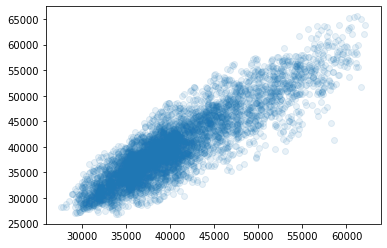

In [54]:
# Keras
# model = Sequential()
# model.add(Dense(20, input_dim = len(features.columns), activation = 'relu'))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1))
# model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = 'mean_absolute_error')
# # Run if using neural network
# scaler = StandardScaler()
# scaler.fit(features)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# model.fit(X_train, Y_train, epochs = 25)
# prediction = model.predict(X_test)
# mae = 100*sum(abs(prediction.ravel() - Y_test))/sum(Y_test)
# print(f'Average Absolute Hourly Miss: {mae} %')
# plt.scatter(prediction, Y_test, alpha = 0.1)

# Plot Results

In [1]:
plt.scatter(prediction, Y_test, alpha = 0.1)
plt.figure()
plt.plot(testTime[0:400], Y_test[0:400])
plt.plot(testTime[0:400], prediction[0:400])
plt.xticks(rotation = 45)
plt.legend(['Actual', 'Prediction'])
plt.rcParams['figure.figsize'] = [10, 5]

NameError: name 'plt' is not defined